<a href="https://colab.research.google.com/github/8dci/T5/blob/main/PCA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA**







#Step 1 : import libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [18]:
iris = load_iris()
X = iris.data
y = iris.target



#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [20]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




In [21]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_standardized)

X_test_pca = pca.transform(X_test_standardized)
print("المكونات الرئيسية لمجموعة التدريب:\n", X_train_pca)
print("المكونات الرئيسية لمجموعة الاختبار:\n", X_test_pca)
print("التباين المفسر من قبل كل مكون:\n", pca.explained_variance_ratio_)

المكونات الرئيسية لمجموعة التدريب:
 [[-2.23668162 -0.1902989 ]
 [ 3.31073884 -0.08420016]
 [ 0.89264251 -0.00743544]
 [ 0.84205306 -0.2544125 ]
 [-2.60668936 -0.50341652]
 [ 1.79978323 -0.88268021]
 [ 1.05500257  0.20441331]
 [ 0.14010403  0.82012539]
 [ 0.54839488  0.16589384]
 [-2.29426364 -0.04984896]
 [-2.30218935 -1.41324902]
 [ 0.19820786  0.41341481]
 [ 0.15701293  1.33511583]
 [ 1.5898168   0.41206945]
 [ 1.09398494  0.29395685]
 [-2.46868659 -0.56280362]
 [ 2.00217884 -0.89452322]
 [ 0.40649311  0.08293506]
 [-2.24962552 -0.9728765 ]
 [ 1.85579025 -0.4436342 ]
 [-2.11457906  0.79550355]
 [-2.32170493  0.42797404]
 [ 2.88518946 -0.47340541]
 [-2.45142806  0.48063318]
 [ 1.83590353 -0.59433975]
 [ 1.32290065 -0.70233993]
 [-1.98014718 -0.34126533]
 [ 1.49149996 -0.28068157]
 [ 0.68755702 -0.59150252]
 [-2.7219151  -1.71115798]
 [-2.29064827 -0.84588248]
 [ 1.98161437 -0.63863922]
 [-2.24099626 -0.4511581 ]
 [ 1.31065601 -0.42802482]
 [ 1.56237551  0.88989246]
 [ 1.32820247 -0.34

#Step 6: Fitting Logistic Regression To the training set




In [23]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train_pca, y_train)

y_pred = logistic_regressor.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


#Step 7: Predicting the test set result




In [26]:
y_pred = logistic_regressor.predict(X_test_pca)

print("التنبؤات لمجموعة الاختبار:\n", y_pred)
print("العلامات الفعلية لمجموعة الاختبار:\n", y_test)

accuracy = accuracy_score(y_test, y_pred)
print("دقة النموذج (Accuracy):", accuracy)


التنبؤات لمجموعة الاختبار:
 [0 1 2 2 1 2 2 1 1 0 1 0 0 2 1 2 2 2 2 1 2 2 1 0 1 0 0 2 0 1 1 0 0 0 0 2 0
 0 2 0 0 1 1 2 2]
العلامات الفعلية لمجموعة الاختبار:
 [0 1 2 2 1 2 1 1 1 0 1 0 0 2 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1 1 0 0 0 0 2 0
 0 2 0 0 1 2 2 2]
دقة النموذج (Accuracy): 0.9333333333333333


#Step 8: Making the confusion matrix




In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("مصفوفة الارتباك (Confusion Matrix):\n", conf_matrix)

مصفوفة الارتباك (Confusion Matrix):
 [[16  0  0]
 [ 0 12  2]
 [ 0  1 14]]


#Step 9: Predicting the training set result




In [28]:
y_train_pred = logistic_regressor.predict(X_train_pca)

print("التنبؤات لمجموعة التدريب:\n", y_train_pred)
print("العلامات الفعلية لمجموعة التدريب:\n", y_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

print("دقة النموذج على مجموعة التدريب (Training Set Accuracy):", train_accuracy)
print("مصفوفة الارتباك لمجموعة التدريب (Training Set Confusion Matrix):\n", train_conf_matrix)

التنبؤات لمجموعة التدريب:
 [0 2 1 1 0 2 1 1 1 0 0 1 1 2 2 0 2 1 0 2 0 0 2 0 2 2 0 2 1 0 0 2 0 2 2 2 1
 2 1 2 0 2 2 2 0 0 0 2 2 1 0 1 2 2 1 1 2 1 2 0 1 1 2 1 2 0 2 2 1 1 0 2 1 0
 1 1 0 0 1 2 0 0 1 0 2 1 2 0 2 1 0 0 2 0 1 1 1 1 0 2 1 0 1 0 1]
العلامات الفعلية لمجموعة التدريب:
 [0 2 2 1 0 2 1 1 1 0 0 1 1 2 2 0 2 1 0 2 0 0 2 0 2 2 0 2 1 0 0 2 0 2 2 1 1
 2 1 2 0 2 1 1 0 0 0 2 2 1 0 1 2 2 1 2 2 1 1 0 1 1 2 1 2 0 2 2 1 1 0 2 1 0
 1 2 0 0 2 1 0 0 1 0 2 1 2 0 2 1 0 0 2 0 1 1 1 1 0 2 1 0 1 0 1]
دقة النموذج على مجموعة التدريب (Training Set Accuracy): 0.9142857142857143
مصفوفة الارتباك لمجموعة التدريب (Training Set Confusion Matrix):
 [[34  0  0]
 [ 0 31  5]
 [ 0  4 31]]


#Step 10: Visualizing the Test set results




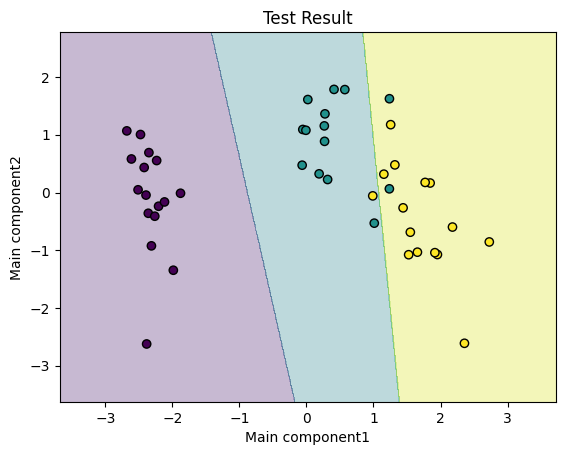

In [31]:
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Main component1')
    plt.ylabel('Main component2')
    plt.show()
plot_decision_boundary(X_test_pca, y_test, logistic_regressor, 'Test Result')

#**Well Done :)**
Now let's practice!